<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Omid Keshavarz

**Student ID**:99102072



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [1]:
## Import necessary libraries here ##
import pandas as pd

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [5]:
## Write your code here ##
boston_df = pd.read_csv("./Q1/Boston.csv")

# Get the shape of the dataset
dataset_shape = boston_df.shape
print("The shape of the Boston dataset is:", dataset_shape)
# Display summary information about the dataset
print(boston_df.describe())

The shape of the Boston dataset is: (506, 14)
             CRIM          ZN       INDUS        CHAS          NX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [7]:
## Write your code here ##

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load the dataset
boston_df = pd.read_csv("./Q1/Boston.csv")

# Split the dataset into features (X) and target variable (y)
X = boston_df.drop(columns=["MEDV"])  # Features
y = boston_df["MEDV"]  # Target variable

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Calculate R^2 score for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print R^2 and RMSE scores
print("Training set:")
print("R^2 score:", r2_train)
print("RMSE:", rmse_train)
print("\nTest set:")
print("R^2 score:", r2_test)
print("RMSE:", rmse_test)

# Get coefficients of the linear regression model
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": linear_reg.coef_})
print("\nCoefficients:")
print(coefficients)


Training set:
R^2 score: 0.7508856358979673
RMSE: 4.6520331848801675

Test set:
R^2 score: 0.6687594935356345
RMSE: 4.928602182665318

Coefficients:
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

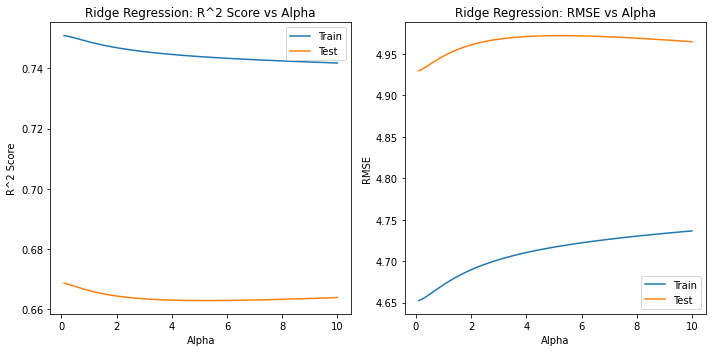

In [9]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Set up alphas parameter
alphas = np.linspace(0.1, 10, 100)

# Initialize lists to store R^2 scores and RMSE for train and test sets
r2_train_scores = []
rmse_train_scores = []
r2_test_scores = []
rmse_test_scores = []

# Train Ridge regression models with different alpha values
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    
    # Make predictions on training and test sets
    y_train_pred = ridge_reg.predict(X_train)
    y_test_pred = ridge_reg.predict(X_test)
    
    # Calculate R^2 scores and RMSE for training and test sets
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append scores to lists
    r2_train_scores.append(r2_train)
    rmse_train_scores.append(rmse_train)
    r2_test_scores.append(r2_test)
    rmse_test_scores.append(rmse_test)

# Plot R^2 scores and RMSE for train and test sets
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, r2_train_scores, label='Train')
plt.plot(alphas, r2_test_scores, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Ridge Regression: R^2 Score vs Alpha')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(alphas, rmse_train_scores, label='Train')
plt.plot(alphas, rmse_test_scores, label='Test')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Ridge Regression: RMSE vs Alpha')
plt.legend()

plt.tight_layout()
plt.show()


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

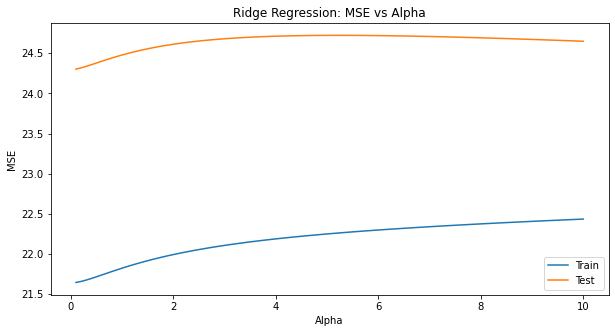

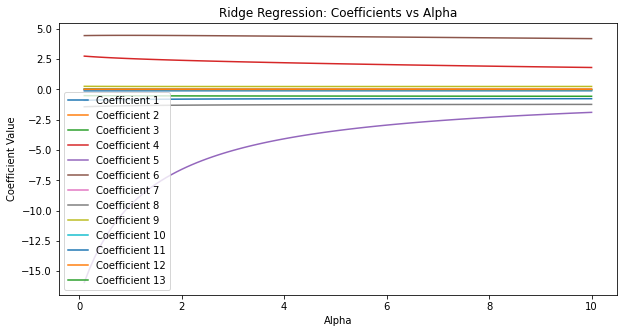

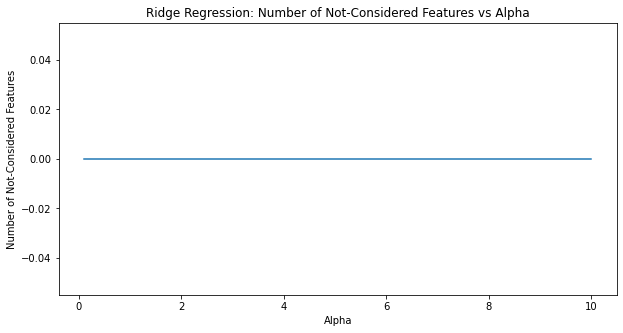

Optimal Alpha: 0.1
MSE (Test): 24.301025500192736
R^2 (Test): 0.6686244122021412
Coefficients (Test): [-1.12399694e-01  3.04593914e-02  3.48958400e-02  2.75033318e+00
 -1.59244585e+01  4.44577949e+00 -7.30474388e-03 -1.42960751e+00
  2.60042840e-01 -1.07802286e-02 -9.00771040e-01  1.24004789e-02
 -5.10902332e-01]


In [10]:
## Write your code here ##
# Initialize lists to store MSE for train and test sets, coefficients, and number of not-considered features
mse_train_scores = []
mse_test_scores = []
coefficients = []
not_considered_features = []

# Train Ridge regression models with different alpha values
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    
    # Make predictions on training and test sets
    y_train_pred = ridge_reg.predict(X_train)
    y_test_pred = ridge_reg.predict(X_test)
    
    # Calculate MSE for training and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Append MSE scores to lists
    mse_train_scores.append(mse_train)
    mse_test_scores.append(mse_test)
    
    # Store coefficients
    coefficients.append(ridge_reg.coef_)
    
    # Count non-zero coefficients
    not_considered_features.append(np.sum(ridge_reg.coef_ == 0))

# Plot MSE for train and test sets versus alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_train_scores, label='Train')
plt.plot(alphas, mse_test_scores, label='Test')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression: MSE vs Alpha')
plt.legend()
plt.show()

# Plot coefficients versus alpha
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 5))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Coefficient {i+1}')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression: Coefficients vs Alpha')
plt.legend()
plt.show()

# Plot number of not-considered features versus alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Ridge Regression: Number of Not-Considered Features vs Alpha')
plt.show()

# Select optimal alpha based on minimum MSE on test set
optimal_alpha_index = np.argmin(mse_test_scores)
optimal_alpha = alphas[optimal_alpha_index]

# Train Ridge regression model with optimal alpha
optimal_ridge_reg = Ridge(alpha=optimal_alpha)
optimal_ridge_reg.fit(X_train, y_train)

# Make predictions on test set
y_test_pred_optimal = optimal_ridge_reg.predict(X_test)

# Calculate R^2 score for test set
r2_test_optimal = r2_score(y_test, y_test_pred_optimal)

# Print results for optimal alpha
print("Optimal Alpha:", optimal_alpha)
print("MSE (Test):", mse_test_scores[optimal_alpha_index])
print("R^2 (Test):", r2_test_optimal)
print("Coefficients (Test):", optimal_ridge_reg.coef_)


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

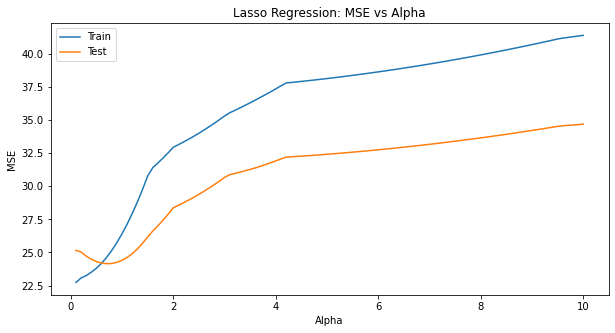

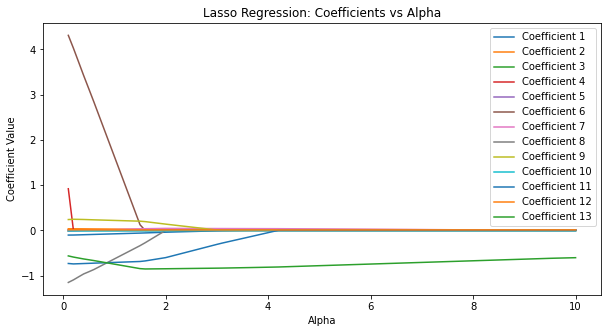

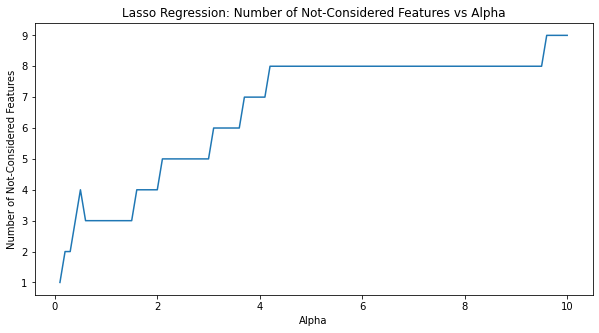

Optimal Alpha (Lasso): 0.7000000000000001
MSE (Test) (Lasso): 24.154355317323873
R^2 (Test) (Lasso): 0.6706244478821253
Coefficients (Test) (Lasso): [-0.0864539   0.03087581 -0.          0.         -0.          2.53457636
  0.00580573 -0.80667813  0.22959913 -0.01271975 -0.72093109  0.01188698
 -0.68780861]


In [11]:
## Write your code here ##
from sklearn.linear_model import Lasso

# Initialize lists to store MSE for train and test sets, coefficients, and number of not-considered features
mse_train_scores_lasso = []
mse_test_scores_lasso = []
coefficients_lasso = []
not_considered_features_lasso = []

# Train Lasso regression models with different alpha values
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    
    # Make predictions on training and test sets
    y_train_pred_lasso = lasso_reg.predict(X_train)
    y_test_pred_lasso = lasso_reg.predict(X_test)
    
    # Calculate MSE for training and test sets
    mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
    mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
    
    # Append MSE scores to lists
    mse_train_scores_lasso.append(mse_train_lasso)
    mse_test_scores_lasso.append(mse_test_lasso)
    
    # Store coefficients
    coefficients_lasso.append(lasso_reg.coef_)
    
    # Count non-zero coefficients
    not_considered_features_lasso.append(np.sum(lasso_reg.coef_ == 0))

# Plot MSE for train and test sets versus alpha for Lasso regression
plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_train_scores_lasso, label='Train')
plt.plot(alphas, mse_test_scores_lasso, label='Test')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Lasso Regression: MSE vs Alpha')
plt.legend()
plt.show()

# Plot coefficients versus alpha for Lasso regression
coefficients_lasso = np.array(coefficients_lasso)
plt.figure(figsize=(10, 5))
for i in range(coefficients_lasso.shape[1]):
    plt.plot(alphas, coefficients_lasso[:, i], label=f'Coefficient {i+1}')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression: Coefficients vs Alpha')
plt.legend()
plt.show()

# Plot number of not-considered features versus alpha for Lasso regression
plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered_features_lasso)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Lasso Regression: Number of Not-Considered Features vs Alpha')
plt.show()

# Select optimal alpha based on minimum MSE on test set for Lasso regression
optimal_alpha_index_lasso = np.argmin(mse_test_scores_lasso)
optimal_alpha_lasso = alphas[optimal_alpha_index_lasso]

# Train Lasso regression model with optimal alpha
optimal_lasso_reg = Lasso(alpha=optimal_alpha_lasso)
optimal_lasso_reg.fit(X_train, y_train)

# Make predictions on test set
y_test_pred_optimal_lasso = optimal_lasso_reg.predict(X_test)

# Calculate R^2 score for test set
r2_test_optimal_lasso = r2_score(y_test, y_test_pred_optimal_lasso)

# Print results for optimal alpha for Lasso regression
print("Optimal Alpha (Lasso):", optimal_alpha_lasso)
print("MSE (Test) (Lasso):", mse_test_scores_lasso[optimal_alpha_index_lasso])
print("R^2 (Test) (Lasso):", r2_test_optimal_lasso)
print("Coefficients (Test) (Lasso):", optimal_lasso_reg.coef_)


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

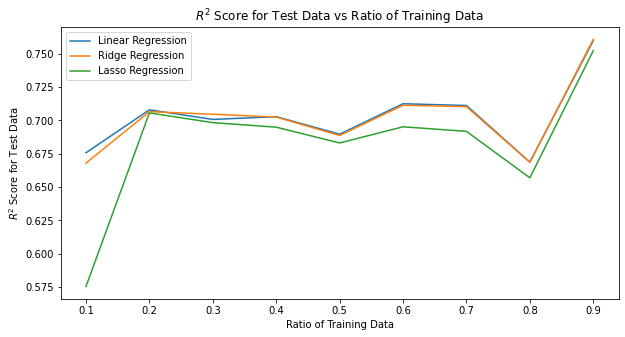

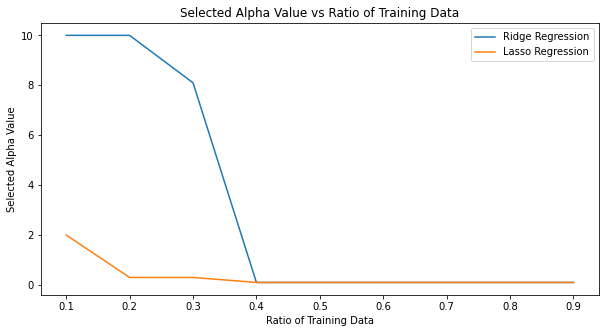

In [13]:
from sklearn.linear_model import RidgeCV, LassoCV

# Initialize lists to store results
r2_scores_linear = []
r2_scores_ridge = []
r2_scores_lasso = []
selected_alphas_ridge = []
selected_alphas_lasso = []

# Loop through different training data ratios
for ratio in training_data_ratios:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

    # Train linear regression model
    linear_reg.fit(X_train, y_train)
    
    # Calculate R^2 score for test set and append to list
    r2_scores_linear.append(r2_score(y_test, linear_reg.predict(X_test)))

    # Train Ridge regression model with cross-validation
    ridge_reg = RidgeCV(alphas=alphas, cv=5)
    ridge_reg.fit(X_train, y_train)
    
    # Calculate R^2 score for test set and append to list
    r2_scores_ridge.append(ridge_reg.score(X_test, y_test))
    
    # Store selected alpha for Ridge regression
    selected_alphas_ridge.append(ridge_reg.alpha_)

    # Train Lasso regression model with cross-validation
    lasso_reg = LassoCV(alphas=alphas, cv=5)
    lasso_reg.fit(X_train, y_train)
    
    # Calculate R^2 score for test set and append to list
    r2_scores_lasso.append(lasso_reg.score(X_test, y_test))
    
    # Store selected alpha for Lasso regression
    selected_alphas_lasso.append(lasso_reg.alpha_)

# Plot R^2 scores for test data versus ratio of training data for linear, ridge, and lasso regression
plt.figure(figsize=(10, 5))
plt.plot(training_data_ratios, r2_scores_linear, label='Linear Regression')
plt.plot(training_data_ratios, r2_scores_ridge, label='Ridge Regression')
plt.plot(training_data_ratios, r2_scores_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('$R^2$ Score for Test Data')
plt.title('$R^2$ Score for Test Data vs Ratio of Training Data')
plt.legend()
plt.show()

# Plot selected alpha values versus training data ratio for ridge and lasso regression methods
plt.figure(figsize=(10, 5))
plt.plot(training_data_ratios, selected_alphas_ridge, label='Ridge Regression')
plt.plot(training_data_ratios, selected_alphas_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value vs Ratio of Training Data')
plt.legend()
plt.show()
